In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets 

from ipywidgets import interact, interactive

In [4]:
df = pd.read_csv('data/dataset.csv', low_memory = False).fillna(0)
df['Installation_number'] = df['Installation_number'].astype(int)
df["Date"] = df["Year"].astype(str) + "/" + df["Month"].astype(str)
df["Date"] = pd.to_datetime(df["Date"], format='%Y/%m/%d')
df.head()

,Year,Month,Consumer_number,Consumer_type,Installation_zone,Consumption,Installation_number,Date
0,2013,1,21018,1,4,0,0,2013-01-01
1,2013,1,36690,2,6,5,0,2013-01-01
2,2013,1,17940,1,6,6,0,2013-01-01
3,2013,1,14273,1,6,1,0,2013-01-01
4,2013,1,5,1,6,13,0,2013-01-01


In [5]:
df = df.drop(columns=['Consumer_number', 'Installation_number'])
df.sample(5)

,Year,Month,Consumer_type,Installation_zone,Consumption,Date
18286,2013,5,1,4,1,2013-05-01
160273,2017,4,1,4,10,2017-04-01
295,2013,1,1,3,0,2013-01-01
302663,2020,1,1,1,1,2020-01-01
65628,2014,4,9,65,1,2014-04-01


In [6]:
zonas = pd.read_excel("data/geo_data/apoio/zona_coordinates.xlsx", sheet_name="Folha1")
zonas

,Zona,Nome,X,Y
0,1,Gimonde,0,0
1,3,Santa-Maria,0,1
2,4,Samil,0,2
3,6,Sé,0,3
4,22,Crijó de Parada,0,4
5,23,S.Pedro de Sarracenos,0,5
6,24,Nogueira,0,6
7,25,Izeda,1,0
8,26,Pinela,1,1
9,27,Castro de Avelãs,1,2


In [7]:
data = df.merge(zonas, left_on='Installation_zone', right_on='Zona')
data = data.drop(columns='Installation_zone')
data = data.rename(columns={'Nome' : 'Zone_name', 'Zona' : 'Zone_code'})
data.head()

,Year,Month,Consumer_type,Consumption,Date,Zone_code,Zone_name,X,Y
0,2013,1,1,0,2013-01-01,4,Samil,0,2
1,2013,1,1,7,2013-01-01,4,Samil,0,2
2,2013,1,4,16,2013-01-01,4,Samil,0,2
3,2013,1,1,5,2013-01-01,4,Samil,0,2
4,2013,1,1,0,2013-01-01,4,Samil,0,2


In [45]:
year = data[data['Consumer_type'] == 1]
year = year.drop(columns=['Zone_name', 'Month', 'Consumer_type'])
year.head()
year.to_csv('data/superset/heatmap_by_zone.csv', index=False)

In [36]:
zona = year.groupby(['Zone_code', 'X', 'Y', 'Year', 'Date'], as_index=False).mean()
zona = zona.drop(columns=['Zone_code'])
year = year.groupby('Year')

In [41]:
years = [2013, 2014, 2016, 2017, 2018, 2019, 2020]

In [ ]:
zona = year.get_group(2013)
zona = zona.drop(columns=['Year'])
zona = year.groupby(['Zone_code', 'X', 'Y']).mean()
zona = zona.reset_index()
zona = zona.drop(columns=['Zone_code'])   
typ_zona = zonas.drop(columns=['Zona', 'Nome'])
typ_zona = pd.merge(typ_zona, zona, how='left', left_on=['X','Y'], right_on = ['X','Y'])
typ_zona.head()

In [43]:
values = []
for ano in (years):
    zona = year.get_group(ano)
    zona = zona.drop(columns=['Year'])
    zona = zona.groupby(['Zone_code', 'X', 'Y']).mean()
    zona = zona.reset_index()
    zona = zona.drop(columns=['Zone_code'])   
    typ_zona = zonas.drop(columns=['Zona', 'Nome'])
    typ_zona = pd.merge(typ_zona, zona, how='left', left_on=['X','Y'], right_on = ['X','Y'])
    zona = typ_zona.pivot(index='X', columns='Y', values='Consumption').fillna(0)

    values.append(zona)

   
    
#     zona_0 = typ_zona.pivot(index='X', columns='Y', values='Consumption')
#     print(zona_0)
#     values.append(zona_0)
#     zona = year.get_group(ano)
#     print(zona)
    
#     zona = zona.drop(columns=['Year'])
#     zona = zona.groupby(['Zone_code', 'X', 'Y']).mean()
#     zona['Consumption'] = ((zona['Consumption'] - zona['Consumption'].min()) * 10) / (zona['Consumption'].max() - zona['Consumption'].min())
#     zona = zona.reset_index()
#     zona = zona.drop(columns=['Zone_code'])
#     zona = zona.pivot(index='X', columns='Y', values='Consumption')
#     values.append(zona)


In [29]:
values


[Y         0         1        2         3    4    5    6
 X                                                      
 0  6.961734  6.828811  6.79159  6.379273  0.0  0.0  0.0
 1  0.000000  0.000000  0.00000  0.000000  0.0  0.0  0.0
 2  0.000000  0.000000  0.00000  0.000000  0.0  0.0  0.0
 3  0.000000  0.000000  0.00000  0.000000  0.0  0.0  0.0
 4  0.000000  0.000000  0.00000  0.000000  0.0  0.0  0.0
 5  0.000000  0.000000  0.00000  0.000000  0.0  0.0  0.0
 6  0.000000  0.000000  0.00000  0.000000  8.5  0.0  0.0
 7  0.000000  0.000000  0.00000  0.000000  0.0  0.0  0.0,
 Y        0         1         2         3    4    5    6
 X                                                      
 0  7.12563  6.762349  6.673795  6.134004  0.0  0.0  0.0
 1  0.00000  0.000000  0.000000  0.000000  0.0  0.0  0.0
 2  0.00000  0.000000  0.000000  0.000000  0.0  0.0  0.0
 3  0.00000  0.000000  0.000000  0.000000  0.0  0.0  0.0
 4  0.00000  0.000000  0.000000  0.000000  0.0  0.0  0.0
 5  0.00000  0.000000  0.00000

In [13]:
anos_dict = {2013:0, 2014:1, 2016:2, 2017:3, 2018:4, 2019:5, 2020:6, 2015:7}
def choose_year(year):
    return anos_dict[year]

In [14]:
slider = ipywidgets.IntSlider(value=0,
                              min=2013,
                              max=2020,
                              step=1,
                              description='Ano:',
                              disabled=False,
                              continuous_update=False,
                              orientation='horizontal',
                              readout=True,
                              readout_format='d')
# slider

In [15]:
def draw_ano(var):
    sns.set(rc={'figure.figsize':(14,10)})
    sns.axes_style("white")
    index = choose_year(var)
    plot = sns.heatmap(values[index], 
                cmap='Blues',
                vmin=0,
                vmax=10,
                square=True,
                xticklabels=False,
                yticklabels=False,
                annot=True)
    plot.set_title('Consumo da agua por ano')
    plt.show()

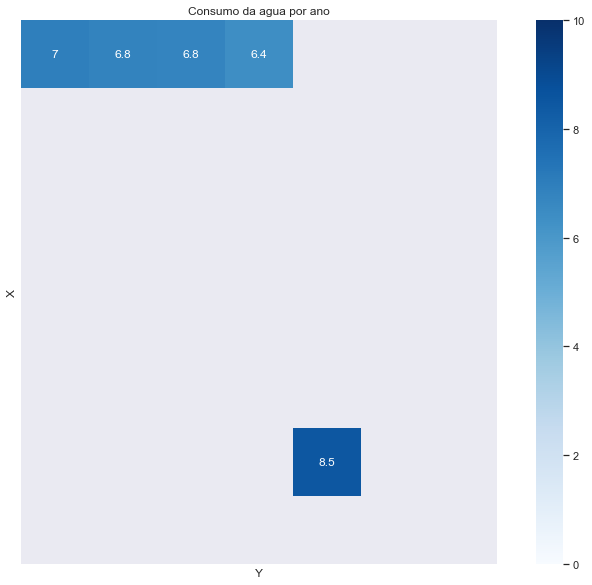

<function __main__.draw_ano(var)>

In [16]:
interact(draw_ano, var=slider) 

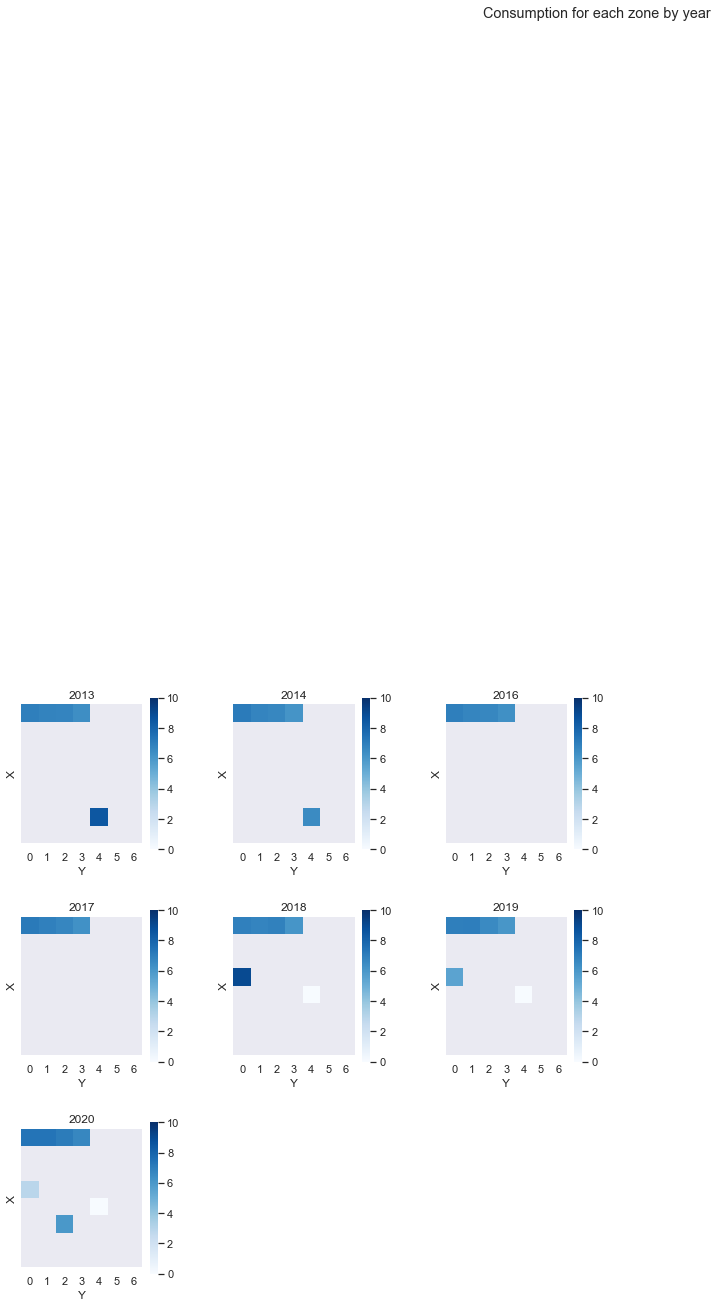

In [18]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20), sharey=True)
fig.suptitle('Consumption for each zone by year')
axes[0][0].set_title(str(years[0]))
sns.axes_style("white")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(values[0], 
                cmap='Blues',
                vmin=0,
                vmax=10,
                square=True,
                xticklabels=True,
                yticklabels=False,
                annot=False,ax = axes[0][0])
axes[0][1].set_title(str(years[1]))
sns.axes_style("white")
sns.heatmap(values[1], 
                cmap='Blues',
                vmin=0,
                vmax=10,
                square=True,
                xticklabels=True,
                yticklabels=False,
                annot=False,ax = axes[0][1])
axes[0][2].set_title(str(years[2]))
sns.axes_style("white")
sns.heatmap(values[2], 
                cmap='Blues',
                vmin=0,
                vmax=10,
                square=True,
                xticklabels=True,
                yticklabels=False,
                annot=False,ax = axes[0][2])
axes[1][0].set_title(str(years[3]))
sns.axes_style("white")
sns.heatmap(values[3], 
                cmap='Blues',
                vmin=0,
                vmax=10,
                square=True,
                xticklabels=True,
                yticklabels=False,
                annot=False,ax = axes[1][0])

axes[1][1].set_title(str(years[4]))
sns.axes_style("white")
sns.heatmap(values[4], 
                cmap='Blues',
                vmin=0,
                vmax=10,
                square=True,
                xticklabels=True,
                yticklabels=False,
                annot=False,ax = axes[1][1])
axes[1][2].set_title(str(years[5]))
sns.axes_style("white")
sns.heatmap(values[5], 
                cmap='Blues',
                vmin=0,
                vmax=10,
                square=True,
                xticklabels=True,
                yticklabels=False,
                annot=False,ax = axes[1][2])
axes[2][0].set_title(str(years[6]))
sns.axes_style("white")
sns.heatmap(values[6], 
                cmap='Blues',
                vmin=0,
                vmax=10,
                square=True,
                xticklabels=True,
                yticklabels=False,
                annot=False,ax = axes[2][0])

axes[2][1].set_visible(False)
axes[2][2].set_visible(False)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.5, 
                    top=0.5, 
                    wspace=0.4, 
                    hspace=0.4)
plt.savefig('charts/exploratory analysis/year_heatmap.png')
plt.show(block=True)
plt.show()
    

# Consumer tipo heatmap

In [19]:
consumer_type =  data.drop(columns=['Year', 'Month', 'Zone_name'])
consumer_type.head()

,Consumer_type,Consumption,Zone_code,X,Y
0,1,0,4,0,2
1,1,7,4,0,2
2,4,16,4,0,2
3,1,5,4,0,2
4,1,0,4,0,2


In [43]:
data.head()
types = [1, 2, 3, 5, 9, 10, 19, 21, 22]
cons_tipos = {1: 'DOMESTICO', 2: ' COM/INDUSTRIAL/OBRAS', 3: 'UTIL.PUBLICA', 4: 'OBRAS', 5: 'ESTADO', 
              6: 'IGREJAS', 7: 'EXP.A.RURAL', 9: 'RURAL DOMESTICO', 10: 'RURAL/ESTADO', 11: 'FAM.NUMEROSAS', 
              12: 'FAM.CARENCIADAS', 13: 'NUMER./CARENC.', 14: 'CP.DOM/URB', 15: 'CP.COM/URB', 16: 'CP.DOM/RURAL', 
              17: 'CP.COM/RURAL', 18: 'IPSS/IGR/RURAL', 19: 'DOM./RURAL A.S', 20: 'COM./RURAL A.S', 
              21: 'REGA', 22: 'CMB'}

In [32]:
tipo_values = []
for tipo in (types):
    zona_0 = data[data['Consumer_type'] == tipo]
    zona_0 = zona_0.drop(columns=['Consumer_type'])
    zona_0 = zona_0.groupby(['Zone_code', 'X', 'Y']).mean()
    zona_0 = zona_0.reset_index()
#     zona_0['Consumption'] = ((zona_0['Consumption'] - zona_0['Consumption'].min()) * 10) / (zona_0['Consumption'].max() - zona_0['Consumption'].min())
    zona_0 = zona_0.drop(columns=['Zone_code'])
    typ_zona = zonas.drop(columns=['Zona'])
    typ_zona = pd.merge(typ_zona, zona_0, how='left', left_on=['X','Y'], right_on = ['X','Y'])
    
    zona_0 = typ_zona.pivot(index='X', columns='Y', values='Consumption')
#     print(zona_0)
    tipo_values.append(zona_0)

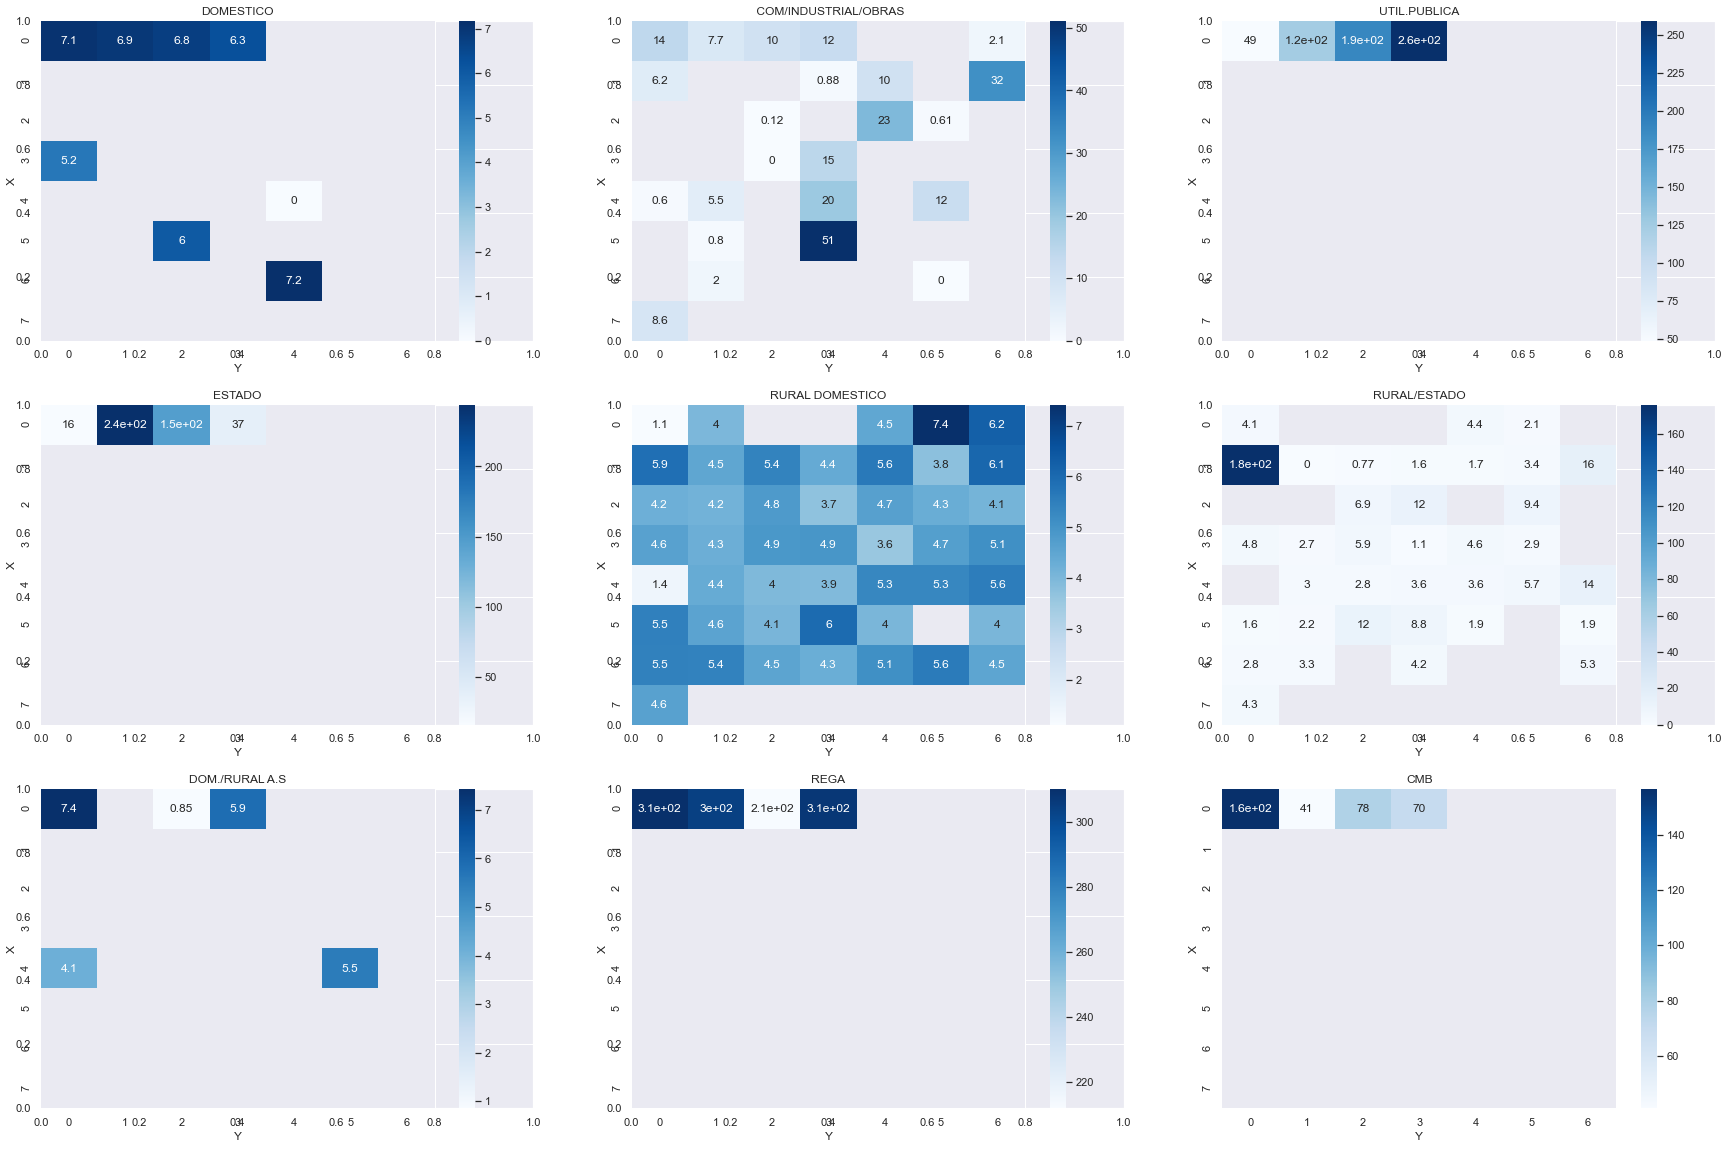

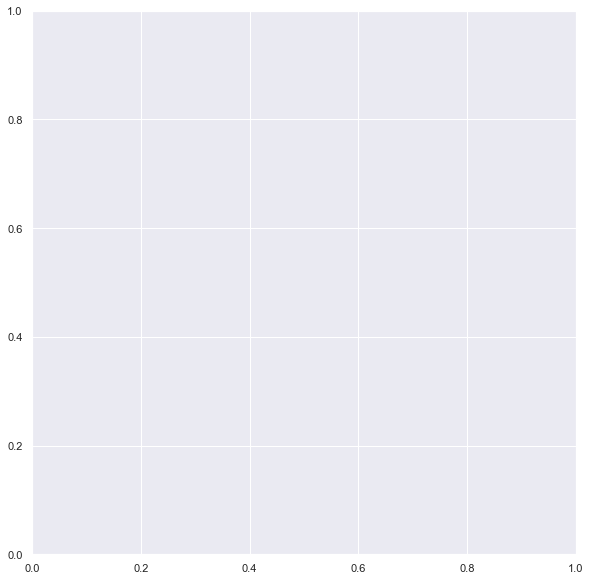

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(30, 20))
plt.axis('off')
for i in range(9):
    tipo = cons_tipos[types[i]]
    ax = fig.add_subplot(3, 3, i+1)
    sns.heatmap(tipo_values[i], cmap='Blues', annot=True, ax = ax).set_title(tipo)
plt.show()
fig.delaxes(axes.flatten()[8])
plt.gca().set_aspect('equal', adjustable='box') 
plt.savefig("charts/exploratory analysis/consumer_type_heatmap.png", bbox_inches='tight')

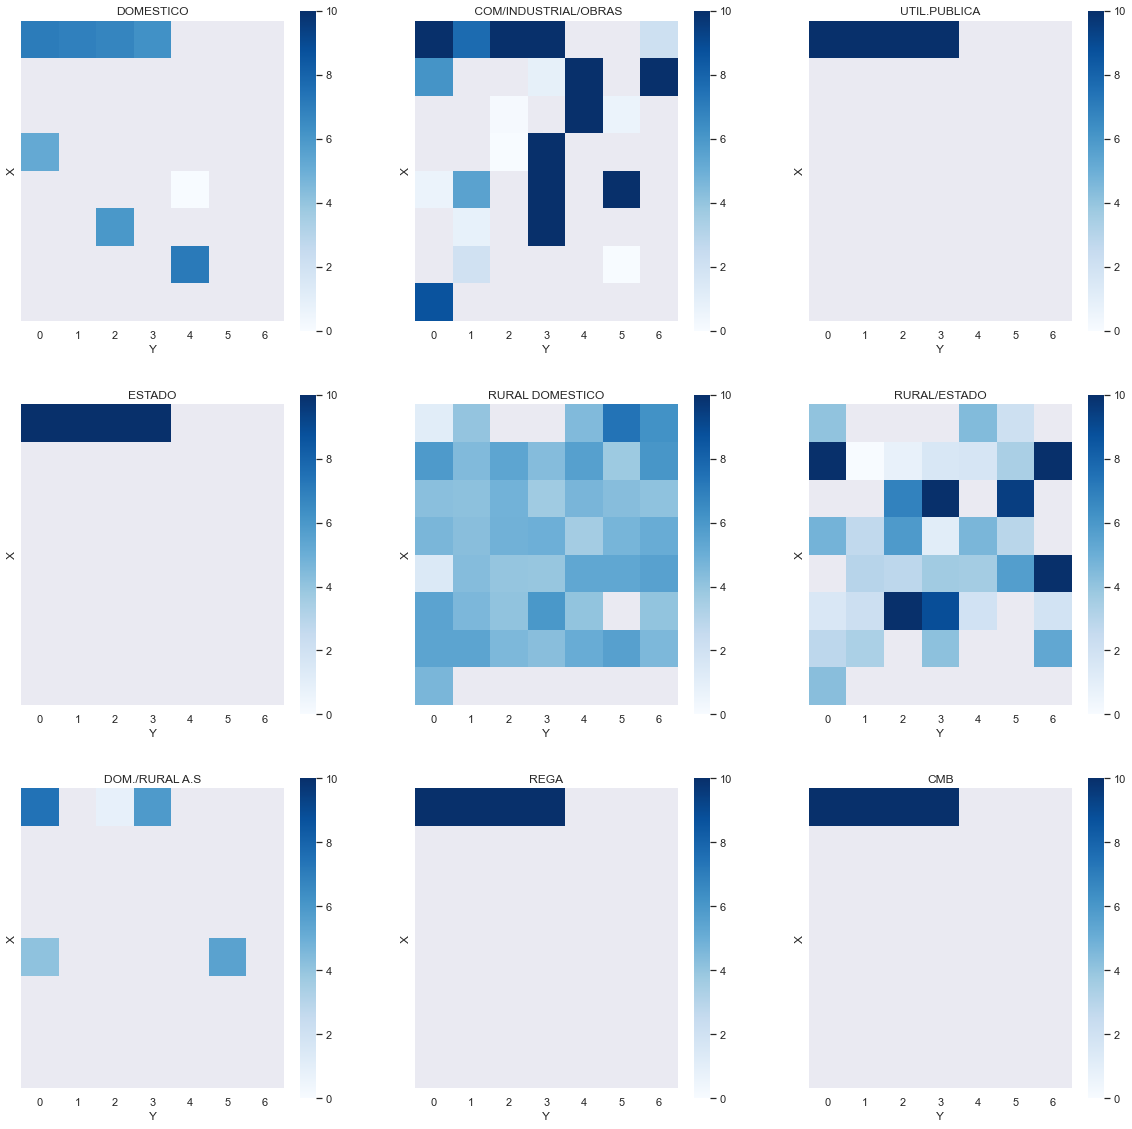

In [64]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20), sharey=True)
plt.title('Consumption for each consumer type')
axes[0][0].set_title(cons_tipos[types[0]])
sns.axes_style("white")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(tipo_values[0], 
                cmap='Blues',
                vmin=0,
                vmax=10,
                square=True,
                xticklabels=True,
                yticklabels=False,
                annot=False,ax = axes[0][0])

axes[0][1].set_title(cons_tipos[types[1]])
sns.axes_style("white")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(tipo_values[1], 
                cmap='Blues',
                vmin=0,
                vmax=10,
                square=True,
                xticklabels=True,
                yticklabels=False,
                annot=False,ax = axes[0][1])
axes[0][2].set_title(cons_tipos[types[2]])
sns.axes_style("white")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(tipo_values[2], 
                cmap='Blues',
                vmin=0,
                vmax=10,
                square=True,
                xticklabels=True,
                yticklabels=False,
                annot=False,ax = axes[0][2])
axes[1][0].set_title(cons_tipos[types[3]])
sns.axes_style("white")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(tipo_values[3], 
                cmap='Blues',
                vmin=0,
                vmax=10,
                square=True,
                xticklabels=True,
                yticklabels=False,
                annot=False,ax = axes[1][0])
axes[1][1].set_title(cons_tipos[types[4]])
sns.axes_style("white")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(tipo_values[4], 
                cmap='Blues',
                vmin=0,
                vmax=10,
                square=True,
                xticklabels=True,
                yticklabels=False,
                annot=False,ax = axes[1][1])
axes[1][2].set_title(cons_tipos[types[5]])
sns.axes_style("white")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(tipo_values[5], 
                cmap='Blues',
                vmin=0,
                vmax=10,
                square=True,
                xticklabels=True,
                yticklabels=False,
                annot=False,ax = axes[1][2])
axes[2][0].set_title(cons_tipos[types[6]])
sns.axes_style("white")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(tipo_values[6], 
                cmap='Blues',
                vmin=0,
                vmax=10,
                square=True,
                xticklabels=True,
                yticklabels=False,
                annot=False,ax = axes[2][0])
axes[2][1].set_title(cons_tipos[types[7]])
sns.axes_style("white")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(tipo_values[7], 
                cmap='Blues',
                vmin=0,
                vmax=10,
                square=True,
                xticklabels=True,
                yticklabels=False,
                annot=False,ax = axes[2][1])
axes[2][2].set_title(cons_tipos[types[8]])
sns.axes_style("white")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(tipo_values[8], 
                cmap='Blues',
                vmin=0,
                vmax=10,
                square=True,
                xticklabels=True,
                yticklabels=False,
                annot=False,ax = axes[2][2])

plt.gca().set_aspect('equal', adjustable='box') 
plt.savefig("charts/exploratory analysis/consumer_type_heatmap.png", bbox_inches='tight')

In [25]:
slider1 = ipywidgets.IntSlider(value=0,
                              min=0,
                              max=20,
                              step=1,
                              description='Tipo de Cons:',
                              disabled=False,
                              continuous_update=False,
                              orientation='horizontal',
                              readout=True,
                              readout_format='d')

In [26]:
# %reset_selective -f slider
def draw_tipo(var):
    sns.set(rc={'figure.figsize':(14,10)})
    sns.axes_style("white")
    plot = sns.heatmap(tipo_values[var], 
                cmap='Blues',
                vmin=0,
                vmax=10,
                square=True,
                xticklabels=False,
                yticklabels=False,
                annot=True)
    plot.set_title('Consumo da agua por tipo de consumidor')
    plt.show()

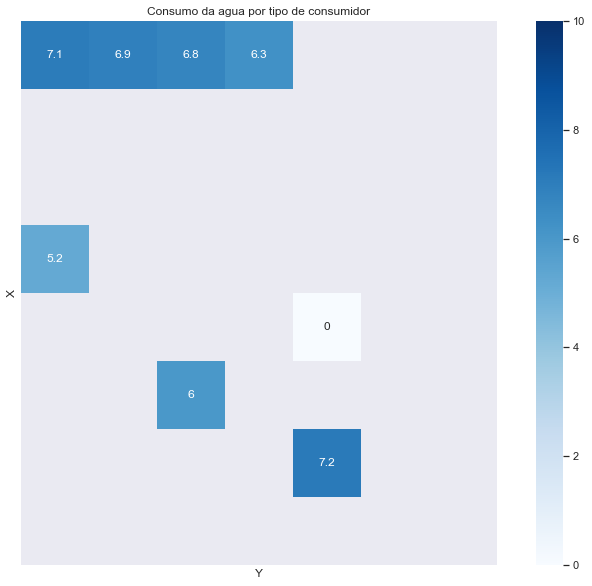

<function __main__.draw_tipo(var)>

In [27]:
interact(draw_tipo, var=slider1)